<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part1-Review-the-course" data-toc-modified-id="Part1-Review-the-course-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part1-Review the course</a></span><ul class="toc-item"><li><span><a href="#Dynamic-Programming-For-Rob-Cutting-Problems(瓷砖分割问题)" data-toc-modified-id="Dynamic-Programming-For-Rob-Cutting-Problems(瓷砖分割问题)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dynamic Programming For Rob Cutting Problems(瓷砖分割问题)</a></span></li><li><span><a href="#压平函数" data-toc-modified-id="压平函数-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>压平函数</a></span></li><li><span><a href="#Finish-the-Solution-Parse-Part-of-Edit-Distance" data-toc-modified-id="Finish-the-Solution-Parse-Part-of-Edit-Distance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Finish the Solution Parse Part of Edit-Distance</a></span></li></ul></li><li><span><a href="#Part2-最短路径推荐DP-Method" data-toc-modified-id="Part2-最短路径推荐DP-Method-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part2-最短路径推荐DP Method</a></span></li></ul></div>

**Reference**

[Ref1](https://github.com/shlinym/AI-For-NLP/blob/master/lecture-4/homework/homework.ipynb)
[Ref2](https://github.com/iyangsongi/AI-For-NL/blob/master/assignment-for-nlp/Assignment-04/Assignment-04.ipynb)

# Part1-Review the course

##  Dynamic Programming For Rob Cutting Problems(瓷砖分割问题)

In [2]:
from collections import defaultdict
piece_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]#分别对应为规模为1,2,3,...,10的瓷砖价格
#给定金额，最小化瓷砖购买数量

price = defaultdict(int)# price: defaultdict(int, {})

for i in range(len(piece_price)):
    price[i + 1] = piece_price[i]
    
price[2]

5

In [3]:
from functools import lru_cache
##加上@functools.lru_cache()装饰器进行缓存实现，使得运算快速

## 压平函数

In [4]:
price1 = defaultdict(int)

In [5]:
def to_chunks(data):
    chunks = []
    
    for i in data:
        if isinstance(i, list):
            sub_data = to_chunks(i)
            for d in sub_data:
                chunks.append(d)
        else:
            chunks.append(i)
            
    return chunks

In [6]:
to_chunks([2, [6,[7,8], [10, [10, [10, [10, [10, 10]]]]]]])

[2, 6, 7, 8, 10, 10, 10, 10, 10, 10]

In [7]:
# put recursive and solution together
@lru_cache(2*10000)
def get_price(num):
    """
    获取瓷砖分割法：先挑最大的，依次往下，使得恰好num数等于所挑[1,2...10]的求和
    """
 
    max_price = price[num]
    steps = num
    # [price, steps]
    for i in range(1, num):
        left = get_price(i)
        right = get_price(num - i)
        if (max_price < left[0] + right[0]):
            max_price = left[0] + right[0]
            steps = to_chunks(left[1:] + right[1:])
        
    return [max_price, steps]

In [8]:
get_price(25)

[73, [2, 3, 10, 10]]

## Finish the Solution Parse Part of Edit-Distance

In [9]:
@lru_cache(maxsize=2**10)
def edit_distance(str1, str2):#将str1与str2对比，比如str1增删改之后变成str2
    
    if not len(str1):return len(str2)
    
    if not len(str2):return len(str1)
    
    tail1 = str1[-1]
    tail2 = str2[-1]
    
    return min(edit_distance(str1[:-1], str2) + 1, # delete
                   edit_distance(str1, str2[:-1]) + 1, # add
                   edit_distance(str1[:-1], str2[:-1]) + (0 if tail1 == tail2 else 2)) 
            # sub

In [10]:
edit_distance("ABCDE", "ABCCEF")

3

In [11]:
edit_distance('ATCGGAA', 'ATCGGGA')

2

In [12]:
solution = []

In [13]:
@lru_cache(maxsize=2**10)##'del'、'add'、’sub‘三种操作，当前操作任意一种后，递归求出此操作下的最短路径。
#lru_cache确保子问题不重复计算
def edit_distance_with_path(str1, str2):
    
    if not len(str1):return [len(str2), ' ']
    
    if not len(str2):return [len(str1), ' ']
    
    tail1 = str1[-1]
    tail2 = str2[-1]
     
    _del = edit_distance_with_path(str1[:-1], str2)
    _add = edit_distance_with_path(str1, str2[:-1])
    _sub = edit_distance_with_path(str1[:-1], str2[:-1])
    op_desc = {
        "del":" Del {}".format(tail1),
        "add":" Add {}".format(tail2),
        "sub0":"",
        "sub2":" Sub {}=>{}".format(tail1, tail2)
    }
    # [distance, operator]
    operator = [
        [_del[0] + 1, _del[1] + op_desc["del"]],
        [_add[0] + 1, _add[1] + op_desc["add"]],  
        [_sub[0] + (0 if tail1 == tail2 else 2), _sub[1] + op_desc["sub" + ('0' if tail1 == tail2 else '2')]],
    ]
    min_op =  min(operator, key=lambda x : x[0])
    return min_op

In [14]:
edit_distance_with_path("ABCDE", "ABCCEF")

[3, '  Add C Del D Add F']

In [15]:
edit_distance_with_path('ATCGGAA', 'ATCGGGA')

[2, '  Add G Del A']

# Part2-最短路径推荐DP Method

In [24]:
import random
import matplotlib.pylab as plt
from functools import lru_cache
%matplotlib inline

In [25]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

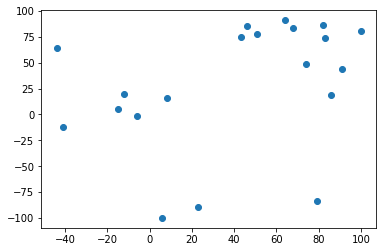

In [26]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [27]:
chosen_p = (5, 10)

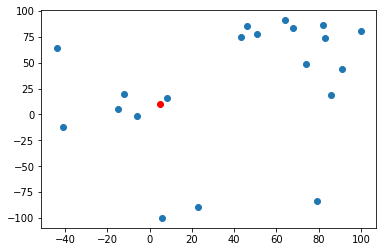

In [28]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

[思路：](https://github.com/iyangsongi/AI-For-NL/blob/master/assignment-for-nlp/Assignment-04/Assignment-04.ipynb)  
+ 子问题求解：$$\sqrt{(x-x_1)^2+(y-y_1)^2}$$
+ 子问题重复：@lru_cache(maxsize=2**15)
+ 边界：所有点距离求解完成
+ 初始点：$$\sqrt{(poins[-1][x]-x_1)^2+(poins[-1][y]-y_1)^2}$$

运行时间：0.3365361089170733s


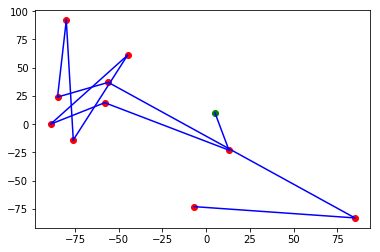

In [29]:
import math
import time
import random
import matplotlib.pylab as plt
from functools import lru_cache
from collections import defaultdict
start=time.clock()
latitudes = [random.randint(-100, 100) for _ in range(10)]
longitude = [random.randint(-100, 100) for _ in range(10)]
selected =()
chosen_p=(5, 10)
points=list(set(zip(latitudes,longitude))|set((selected)))
solution=[]
@lru_cache(maxsize=None)
def get_distance(point1,point2):
    x,y=point1
    x_1,y_1=point2
    return math.sqrt(pow(x-x_1,2)+pow(y-y_1,2))
@lru_cache(maxsize=None)
def min_distance(chosen_p,selected):
    if len(selected)==len(points):return 0,0
    selected=list(selected)
    list_points=set(points)-set(selected)
    distance,point=min([(get_distance(chosen_p,p)+min_distance(p,tuple(sorted(selected+[p],key=points.index) ))[0],p) for p in list_points ],key=lambda x:x[0])
    last_selected=sorted(list(set(selected)-set(chosen_p)),key=selected.index)
    if last_selected  in solution:
        for x in solution:
            if x==last_selected:
                x=selected
    else:
        solution.append(selected)
    return distance,point

distance,point=min_distance(chosen_p,selected)
for x in solution:
    if sorted([point]+x,key=points.index)==points:
        path=[chosen_p]+[point]+x
plt.scatter([chosen_p[0]], [chosen_p[1]], color='g')
plt.scatter(latitudes, longitude, color='r')
for k,v in enumerate(path):
    if k<len(path)-1:
        x,y=v
        x_1,y_1=path[k+1]
        plt.plot([x,x_1],[y,y_1], color='b')
end=time.clock()
print("运行时间：{}s".format(end-start))